<a href="https://colab.research.google.com/github/valtanenamanda/FAIML_exercises/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
Feature set size: (5000, 5)
Variable set size: (5000,)
Training feature set size: (3500, 5)
Testing feature set size: (1500, 5)
Training target set size: (3500,)
Testing target set size: (1500,)
Intercept (β₀): -2638673.4261902785
Coefficients (β₁, β₂, ...): [2.16257989e+01 1.65590393e+05 1.19827783e+05 2.36

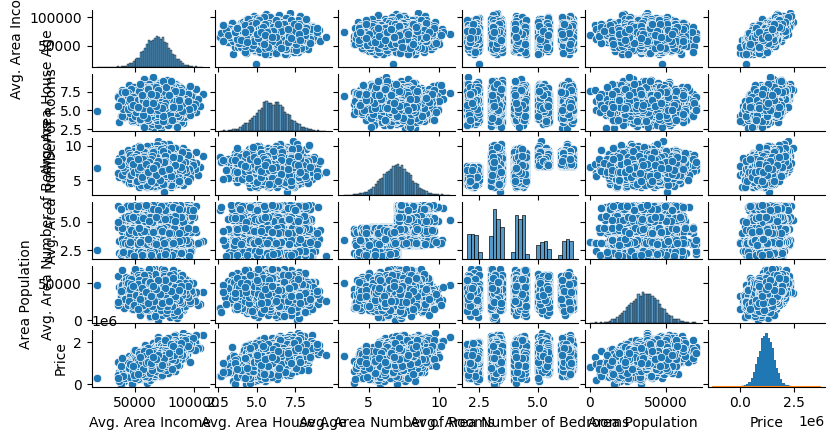

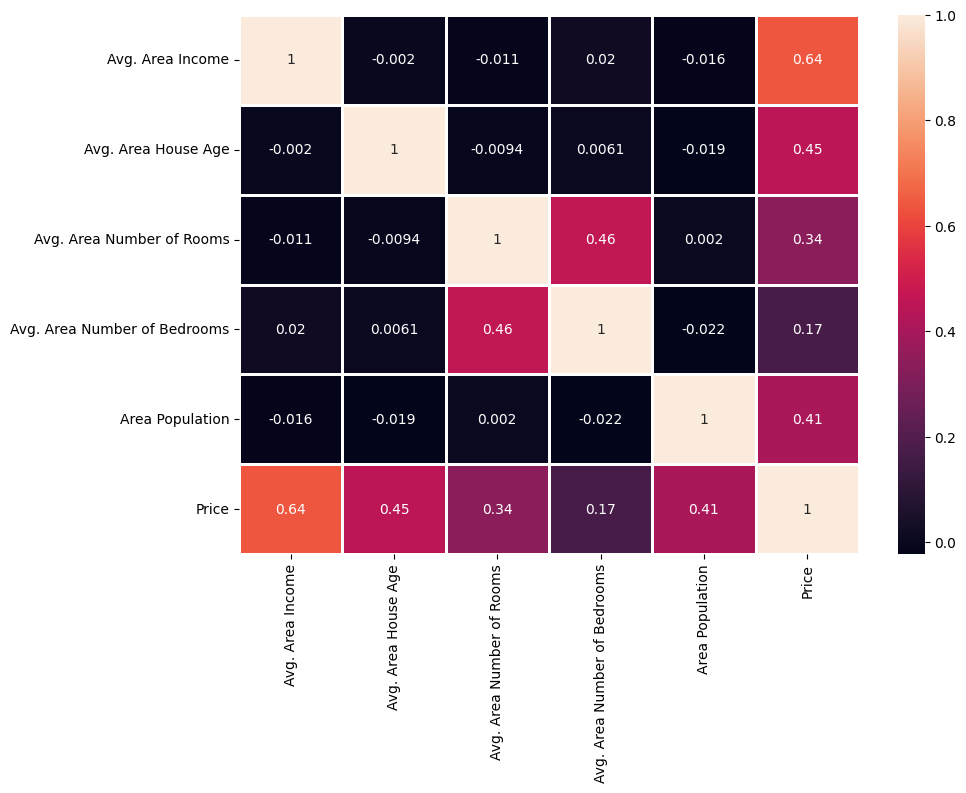

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("./USA_Housing.csv")
df.head()

df.info(verbose=True)

df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

df.columns

sns.pairplot(df)

df['Price'].plot.hist(bins=25,figsize=(8,4))

df['Price'].plot.density()

df.corr(numeric_only=True)

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=2)

l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]

print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

X.head()

y.head()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()

model.fit(X_train, y_train)

print("Intercept (β₀):", model.intercept_)

print("Coefficients (β₁, β₂, ...):", model.coef_)






                               Coefficients  Standard Error  t-statistic
Avg. Area Income                  21.625799        0.159454   135.624094
Avg. Area House Age           165590.392746     1733.940193    95.499483
Area Population                   15.216581        0.172598    88.161794
Avg. Area Number of Rooms     119827.783390     1697.450899    70.592783
Avg. Area Number of Bedrooms    2361.095262     1400.278827     1.686161


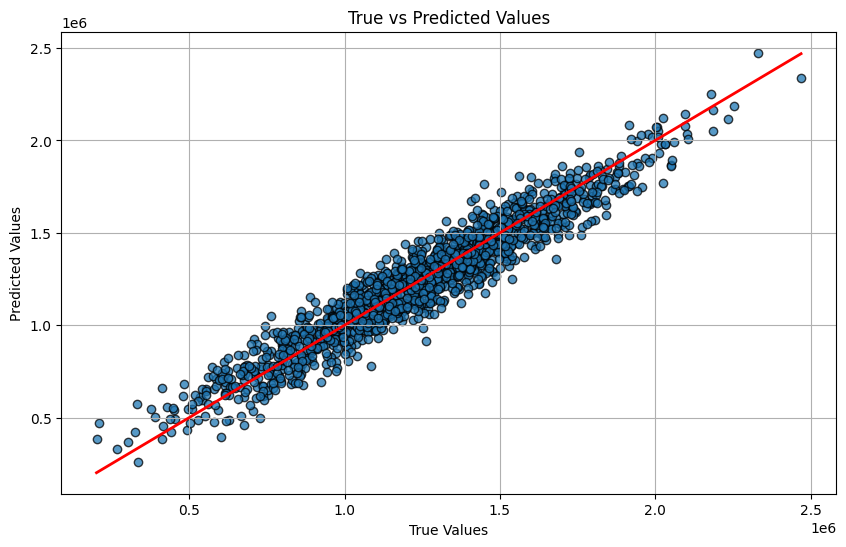

In [ ]:
def metric_calculations(X_train, y_train, model):
    # Function to calculate the standard error and the t-statistic based on the model predictions,
    # returns a dataframe which contains the coefficients, standard error and t-statistic
    cdf = pd.DataFrame(model.coef_,X.columns,columns=['Coefficients'])
    n=X_train.shape[0]
    k=X_train.shape[1]
    dfN = n-k
    train_pred=model.predict(X_train)
    train_error = np.square(train_pred - y_train)
    sum_error=np.sum(train_error)
    se=[0,0,0,0,0]
    for i in range(k):
        r = (sum_error/dfN)
        r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
        se[i]=np.sqrt(r)
    cdf['Standard Error']=se
    cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
    return cdf

coefficients_df = metric_calculations(X_train, y_train, model)
coefficients_sorted = coefficients_df.sort_values(by='t-statistic', ascending=False)
print(coefficients_sorted)

y_pred = model.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, edgecolor='k', linewidth=1, alpha=0.75)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line representing the perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.show()

Mean Absolute Error (MAE): 81135.5660933687
Mean Squared Error (MSE): 10068422551.400827
Root Mean Squared Error (RMSE): 100341.5295448541
R-squared (R²): 0.914681849875402


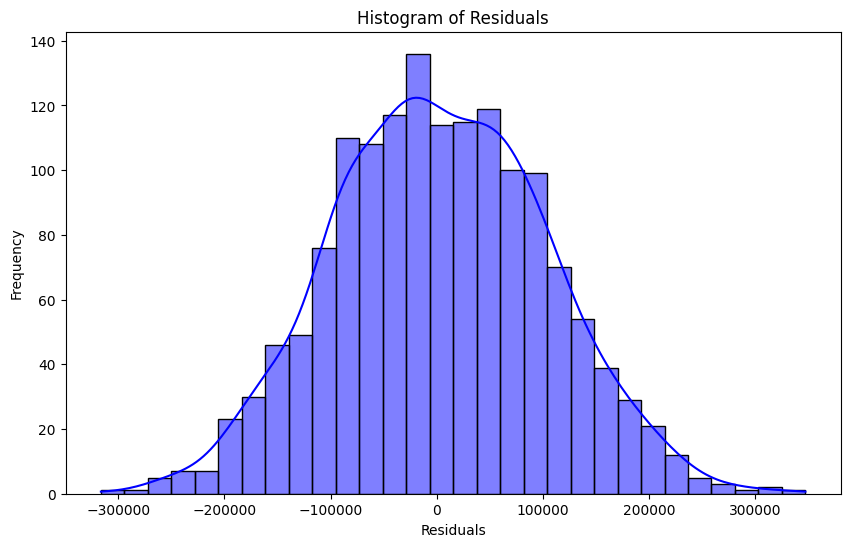

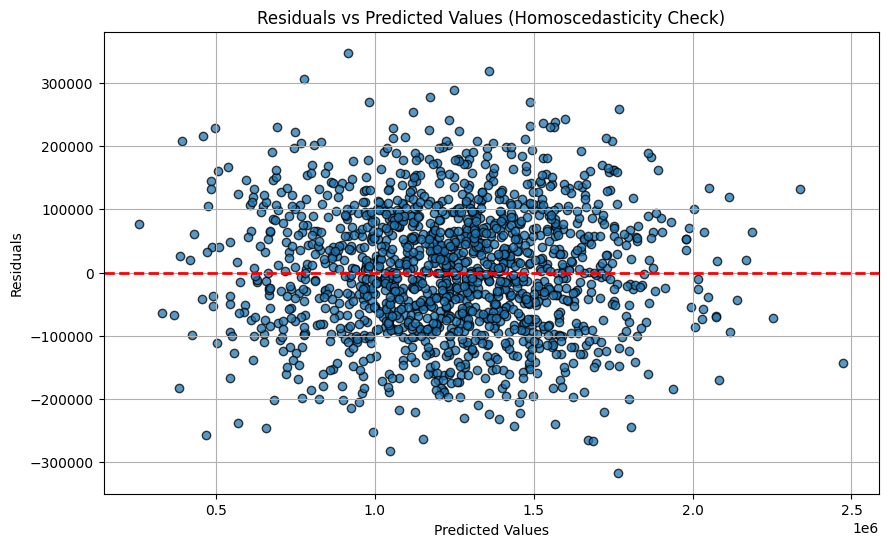

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = metrics.r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

residuals = y_test - y_pred


plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.75)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.grid(True)
plt.show()